## Uppgift 0 -  Tips data EDA



## A

In [21]:
import seaborn as sns
import pandas as pd


# Ladda tips-datasetet
df = sns.load_dataset("tips")

# Utför grundläggande EDA
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## B 

Att använda describe() endast på relevanta kolumner och skapa lämpliga diagram för de numeriska kolumnerna.



### Förklaring:
 1. numerical_columns.describe(): Ger beskrivande statistik för de numeriska kolumnerna (t.ex.medelvärde, standardavvikelse, min, max, kvartiler).
2. sns.barplot: Skapar ett stapeldiagram för varje numerisk kolumn där x-axeln visar statistiken (t.ex. mean, std, min, max) och y-axeln visar värdena.
3. Exempel på diagram:
 För kolumnen total_bill skulle diagrammet visa medelvärdet, standardavvikelsen, min, max, etc. som staplar.


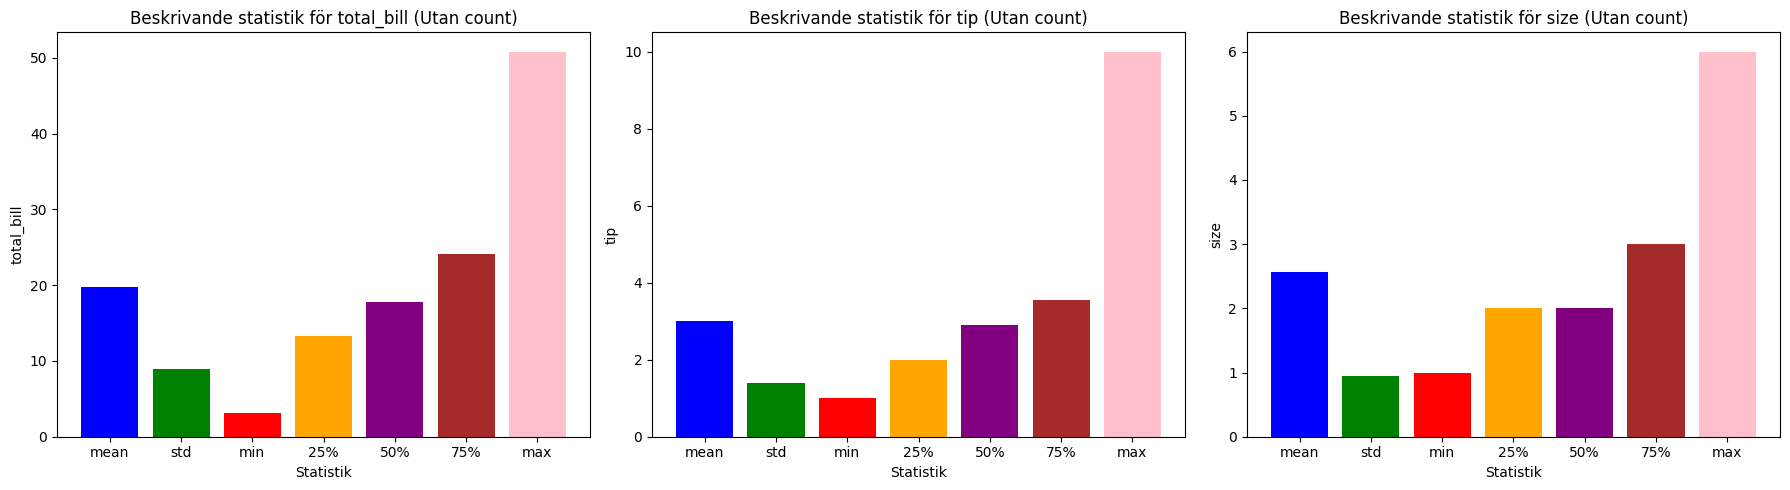

In [22]:
import matplotlib.pyplot as plt

# Välj relevanta numeriska kolumner
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Beskrivande statistik för numeriska kolumner
desc_stats = numerical_columns.describe()

# Skapa en färg för varje variabel på x-axeln
color_map = {
    'mean': 'blue',
    'std': 'green',
    'min': 'red',
    '25%': 'orange',
    '50%': 'purple',
    '75%': 'brown',
    'max': 'pink'
}

# Skapa en figur med tre subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loopa genom varje numerisk kolumn och skapa ett diagram i varje subplot
for i, column in enumerate(numerical_columns.columns):
    for stat in desc_stats.index[1:]:
        axes[i].bar(stat, desc_stats.loc[stat, column], color=color_map[stat])
    axes[i].set_title(f'Beskrivande statistik för {column} (Utan count)')
    axes[i].set_xlabel('Statistik')
    axes[i].set_ylabel(column)  # Sätter kolumnnamnet som y-axelns label

plt.tight_layout()
plt.show()

## C

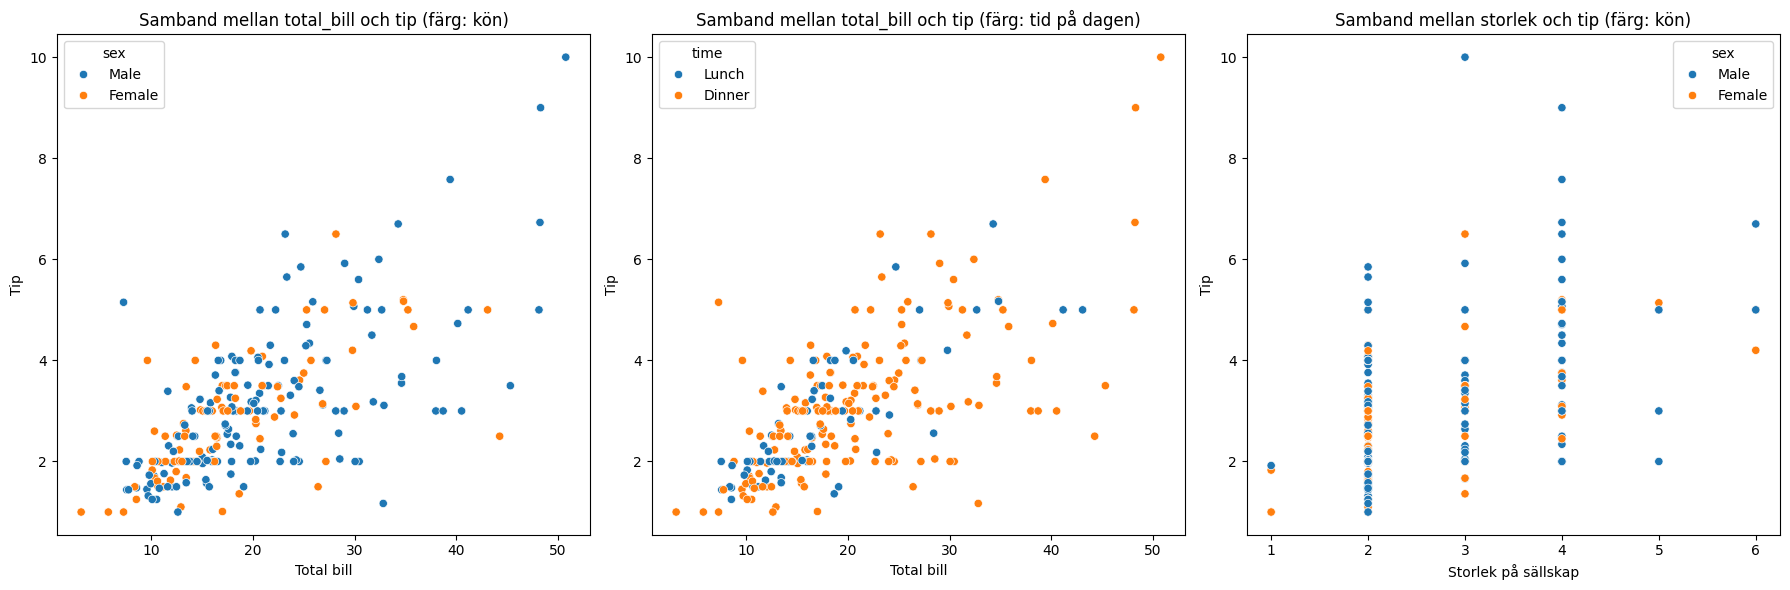

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Skapa en figur med 3 subplots (1 rad och 3 kolumner)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Samband mellan total_bill och tip (färglagd baserat på kön)
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df, ax=axes[0])
axes[0].set_title('Samband mellan total_bill och tip (färg: kön)')
axes[0].set_xlabel('Total bill')
axes[0].set_ylabel('Tip')

# 2. Samband mellan total_bill och tip (färglagd baserat på tid på dagen)
sns.scatterplot(x='total_bill', y='tip', hue='time', data=df, ax=axes[1])
axes[1].set_title('Samband mellan total_bill och tip (färg: tid på dagen)')
axes[1].set_xlabel('Total bill')
axes[1].set_ylabel('Tip')

# 3. Samband mellan storlek på sällskap och tip (färglagd baserat på kön)
sns.scatterplot(x='size', y='tip', hue='sex', data=df, ax=axes[2])
axes[2].set_title('Samband mellan storlek och tip (färg: kön)')
axes[2].set_xlabel('Storlek på sällskap')
axes[2].set_ylabel('Tip')

# Justera layouten
plt.tight_layout()
plt.show()

## D


Diskuterat med mig själv

## Uppgift 1 - Train Test Split


## A

Förklaring:

1.  X = df[['total_bill', 'size']]: Väljer de oberoende variablerna (total_bill och size).
2.  y = df['tip']: Väljer den beroende variabeln (tip).
3.  train_test_split: Delar upp datan i tränings- och testdelar med 70% träningsdata och 30% testdata.
4.  random_state=42: Säkerställer att delningen är reproducerbar.

In [24]:
from sklearn.model_selection import train_test_split

# Dela upp datasetet i tränings- och testdelar
X = df[['total_bill', 'size']]  # Oberoende variabler
y = df['tip']  # Beroende variabel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visa storleken på tränings- och testdatamängderna
print(f"Träningsdata: {X_train.shape}, Testdata: {X_test.shape}")

Träningsdata: (170, 2), Testdata: (74, 2)


## Uppgift 2 - Feature standardization


## A

### Förklaring:
1. mean_train och std_train: Beräknar medelvärdet och standardavvikelsen för träningsdatamängden.
2. X_train_scaled: Standardiserar träningsdatamängden med formeln: [ X_{train}' = \frac{X_{train} - \mu_{train}}{\sigma_{train}} ]
3. X_test_scaled: Standardiserar testdatamängden med samma medelvärde och standardavvikelse som träningsdatamängden.
4. Kontroll av resultat: Vi kontrollerar att medelvärdet för standardiserad träningsdata är nära 0 och att standardavvikelsen är     nära 1. För testdatamängden kan medelvärdet och standardavvikelsen skilja sig något.

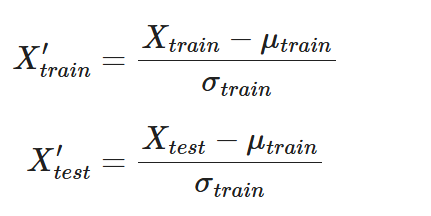

In [25]:
import numpy as np

# Beräkna medelvärde och standardavvikelse för träningsdata
mean_train = X_train.mean()
std_train = X_train.std()

# Standardisera träningsdata
X_train_scaled = (X_train - mean_train) / std_train

# Standardisera testdata med samma medelvärde och standardavvikelse
X_test_scaled = (X_test - mean_train) / std_train

# Kontrollera medelvärde och standardavvikelse för standardiserad träningsdata
print("Medelvärde för standardiserad träningsdata:")
print(X_train_scaled.mean())

print("\nStandardavvikelse för standardiserad träningsdata:")
print(X_train_scaled.std())

# Kontrollera medelvärde och standardavvikelse för standardiserad testdata
print("\nMedelvärde för standardiserad testdata:")
print(X_test_scaled.mean())

print("\nStandardavvikelse för standardiserad testdata:")
print(X_test_scaled.std())

Medelvärde för standardiserad träningsdata:
total_bill    6.791953e-17
size         -1.985340e-16
dtype: float64

Standardavvikelse för standardiserad träningsdata:
total_bill    1.0
size          1.0
dtype: float64

Medelvärde för standardiserad testdata:
total_bill   -0.191380
size         -0.044779
dtype: float64

Standardavvikelse för standardiserad testdata:
total_bill    0.924957
size          1.066389
dtype: float64


## Uppgift 3 - Polynomial features

## A

### Förklaring:


1. PolynomialFeatures(degree=2, include_bias=False): Skapar ett objekt för att generera polynomfunktioner av grad 2. 
2. include_bias=False innebär att vi inte inkluderar en bias-kolumn (en kolumn med ettor).
3. fit_transform(X_train_scaled): Anpassar och transformerar träningsdatamängden till polynomfunktioner.
4. transform(X_test_scaled): Transformerar testdatamängden med samma polynomfunktioner som träningsdatamängden.
5. fit_transform(X_test_scaled): Skapar polynomfunktioner direkt för testdatamängden (för jämförelse).
6. Jämförelse: Jämför de två versionerna av testdata för att se om de är identiska.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Skapa ett PolynomialFeatures-objekt med grad 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Anpassa och transformera träningsdata
X_train_poly = poly.fit_transform(X_train_scaled)

# Transformera testdata
X_test_poly = poly.transform(X_test_scaled)

# Skapa polynomfunktioner direkt för testdata (för jämförelse)
X_test_poly_alt = poly.fit_transform(X_test_scaled)

# Jämför de två versionerna av testdata
comparison = (X_test_poly == X_test_poly_alt).all()
print("Är de två versionerna av testdata identiska?", comparison)

Är de två versionerna av testdata identiska? True


## Uppgift 4 - Polynomial regression


## A

### Forklaring:

1. PolynomialFeatures: Skapar polynomfunktioner för varje grad (1 till 4).
2. LinearRegression: Utför linjär regression på de polynomfunktioner som skapats.
3. mean_squared_error: Beräknar medelkvadratfelet (MSE) för förutsägelserna.
4. np.sqrt: Beräknar RMSE (Root Mean Squared Error) genom att ta kvadratroten av MSE.
5. Plot: Visar RMSE för tränings- och testdata för varje grad av polynomregression.

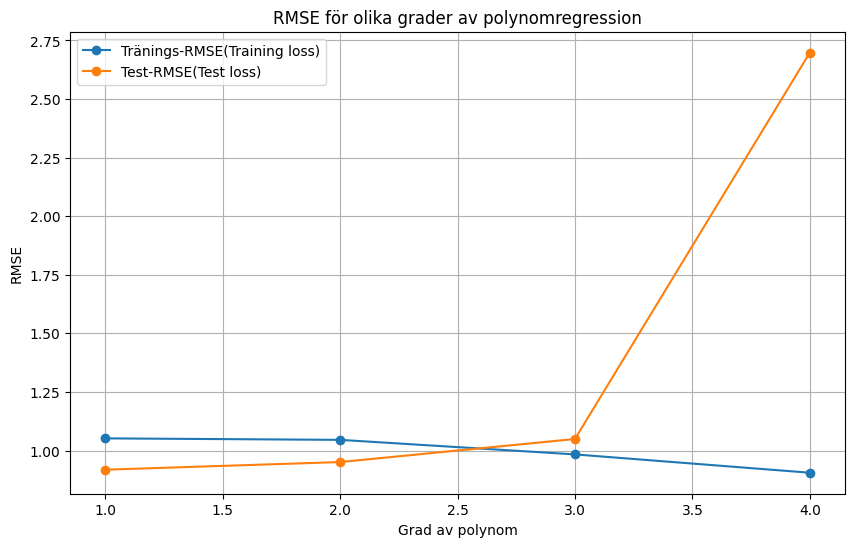

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initiera listor för att lagra RMSE-värden
train_rmse = []
test_rmse = []

# Loopa genom grader 1 till 4
for degree in range(1, 5):
    # Skapa polynomfunktioner
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    # Utför linjär regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Förutsäg på tränings- och testdata
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Beräkna RMSE för tränings- och testdata
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Plotta RMSE för tränings- och testdata
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), train_rmse, label='Tränings-RMSE' "(Training loss)", marker='o')
plt.plot(range(1, 5), test_rmse, label='Test-RMSE'"(Test loss)", marker='o')
plt.xlabel('Grad av polynom')
plt.ylabel('RMSE')
plt.title('RMSE för olika grader av polynomregression')
plt.legend()
plt.grid(True)
plt.show()

## Uppgift 5 - Regularization methods

Vi ska alltså använda tre olika regulariseringsmetoder (Ridge, Lasso, ElasticNet) för att minska överanpassning och förbättra modellens prestanda. 

## A

# Ridge Regression med RidgeCV

## Vad är RidgeCV?
`RidgeCV` är en klass från `sklearn.linear_model` som används för att utföra **Ridge Regression** med **korsvalidering**. Här är vad den gör:
- **Ridge Regression**: En regulariseringsmetod som lägger till en straffterm (L2-straff) till modellens kostnadsfunktion för att minska överanpassning. Strafftermen bestäms av ett alpha-värde (\(\alpha\)).
- **Korsvalidering (CV)**: `RidgeCV` använder korsvalidering för att automatiskt hitta det bästa alpha-värdet bland de angivna alternativen. Detta görs genom att dela upp träningsdatamängden i flera delar och testa olika alpha-värden för att hitta det som ger bäst prestanda.

### Exempel på användning:
```python
ridge = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 5, 10], cv=5)
ridge.fit(X_train_poly, y_train)

In [28]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Skapa polynomfunktioner av grad 4
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Definiera alpha-värden för Ridge Regression enligt uppgift
ridge_alphas = [0.01, 0.1, 0.5, 1, 5, 10]

# Skapa och träna Ridge Regression-modellen med korsvalidering
ridge = RidgeCV(alphas=ridge_alphas, cv=5)
ridge.fit(X_train_poly, y_train)

# Hitta det bästa alpha-värdet
best_alpha = ridge.alpha_
print(f"Bästa alpha-värdet för Ridge Regression: {best_alpha}")

# Kontrollera vikterna (koefficienterna)
print("\nVikter för Ridge Regression:")
print(ridge.coef_)

# Beräkna och skriva ut felmått för tränings- och testdata
y_train_pred = ridge.predict(X_train_poly)
y_test_pred = ridge.predict(X_test_poly)

print("\nRidge Regression - Träningsdata:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")

print("\nRidge Regression - Testdata:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")

Bästa alpha-värdet för Ridge Regression: 5.0

Vikter för Ridge Regression:
[ 0.91469637  0.23893931 -0.67583593  0.20550801 -0.01369317 -0.26007685
  0.31867863 -0.03429744 -0.12484035  0.16000319 -0.18105113  0.24878399
 -0.12692847  0.05002613]

Ridge Regression - Träningsdata:
MAE: 0.692
MSE: 0.861
RMSE: 0.928

Ridge Regression - Testdata:
MAE: 0.831
MSE: 2.208
RMSE: 1.486


## B

# Lasso Regression med LassoCV

## Vad är LassoCV?
`LassoCV` är en klass från `sklearn.linear_model` som används för att utföra **Lasso Regression** med **korsvalidering**. Här är vad den gör:
- **Lasso Regression**: En regulariseringsmetod som lägger till en straffterm (L1-straff) till modellens kostnadsfunktion för att minska överanpassning. Strafftermen bestäms av ett alpha-värde (\(\alpha\)).
- **Korsvalidering (CV)**: `LassoCV` använder korsvalidering för att automatiskt hitta det bästa alpha-värdet bland de angivna alternativen. Detta görs genom att dela upp träningsdatamängden i flera delar och testa olika alpha-värden för att hitta det som ger bäst prestanda.

### Exempel på användning:
```python
lasso = LassoCV(n_alphas=100, cv=5, max_iter=10000)
lasso.fit(X_train_poly, y_train)


In [29]:
from sklearn.linear_model import LassoCV

# Skapa polynomfunktioner av grad 4
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Skapa och träna Lasso Regression-modellen med korsvalidering
lasso = LassoCV(n_alphas=100, cv=5, max_iter=10000)
lasso.fit(X_train_poly, y_train)

# Hitta det bästa alpha-värdet
best_alpha = lasso.alpha_
print(f"Bästa alpha-värdet för Lasso Regression, eller valt värde : {best_alpha}")

# Kontrollera vikterna (koefficienterna)
print("\nVikter för Lasso Regression:")
print(lasso.coef_)

# Beräkna och skriva ut felmått för tränings- och testdata
y_train_pred = lasso.predict(X_train_poly)
y_test_pred = lasso.predict(X_test_poly)

print("\nLasso Regression - Träningsdata:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")

print("\nLasso Regression - Testdata:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")

Bästa alpha-värdet för Lasso Regression, eller : 0.20770232166587632

Vikter för Lasso Regression:
[ 0.23469707  0.         -0.         -0.          0.          0.08814685
  0.09735986  0.          0.03219702  0.          0.          0.
 -0.          0.        ]

Lasso Regression - Träningsdata:
MAE: 0.835
MSE: 1.146
RMSE: 1.070

Lasso Regression - Testdata:
MAE: 0.823
MSE: 1.345
RMSE: 1.160


## C

# ElasticNet Regression med ElasticNetCV

## Vad är ElasticNetCV?
`ElasticNetCV` är en klass från `sklearn.linear_model` som används för att utföra **ElasticNet Regression** med **korsvalidering**. Här är vad den gör:
- **ElasticNet Regression**: En regulariseringsmetod som kombinerar både L1- och L2-straff för att minska överanpassning. Strafftermen bestäms av ett alpha-värde (\(\alpha\)) och en \(\ell_1\)-ratio.
- **Korsvalidering (CV)**: `ElasticNetCV` använder korsvalidering för att automatiskt hitta det bästa alpha-värdet och \(\ell_1\)-ratio bland de angivna alternativen. Detta görs genom att dela upp träningsdatamängden i flera delar och testa olika kombinationer av alpha och \(\ell_1\)-ratio för att hitta den som ger bäst prestanda.

### Exempel på användning:
```python
elastic = ElasticNetCV(l1_ratio=[0.001, 0.01, 0.05, 0.1, 0.5, 0.9, 0.95, 1], n_alphas=100, cv=5, max_iter=10000)
elastic.fit(X_train_poly, y_train)

In [30]:
from sklearn.linear_model import ElasticNetCV



# Skapa polynomfunktioner av grad 4
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Definiera l1-ratio-värden
elastic_ratios = [0.001, 0.01, 0.05, 0.1, 0.5, 0.9, 0.95, 1]

# Skapa och träna ElasticNet Regression-modellen med korsvalidering
elastic = ElasticNetCV(l1_ratio=elastic_ratios, n_alphas=100, cv=5, max_iter=10000)
elastic.fit(X_train_poly, y_train)

# Hitta det bästa alpha-värdet och l1-ratio
best_alpha = elastic.alpha_
best_l1_ratio = elastic.l1_ratio_
print(f"Bästa alpha-värdet för ElasticNet Regression eller valt värde: {best_alpha}")
print(f"Bästa l1-ratio: {best_l1_ratio}")

# Kontrollera vikterna (koefficienterna)
print("\nVikter för ElasticNet Regression:")
print(elastic.coef_)

# Beräkna och skriva ut felmått för tränings- och testdata
y_train_pred = elastic.predict(X_train_poly)
y_test_pred = elastic.predict(X_test_poly)

print("\nElasticNet Regression - Träningsdata:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")

print("\nElasticNet Regression - Testdata:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")

Bästa alpha-värdet för ElasticNet Regression: 0.10711875299553128
Bästa l1-ratio: 0.9

Vikter för ElasticNet Regression:
[ 0.51936778  0.09958848 -0.21441971  0.          0.          0.
  0.11409441  0.          0.01801213  0.03754525  0.          0.
  0.          0.        ]

ElasticNet Regression - Träningsdata:
MAE: 0.757
MSE: 0.989
RMSE: 0.994

ElasticNet Regression - Testdata:
MAE: 0.761
MSE: 1.298
RMSE: 1.139
